In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sklearn
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [4]:
data=pd.read_excel('cars_train.xlsx')
data.head()

,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,...,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,Car_Price
0,1,129.0,mazda,gas,std,two,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,10595.0
1,1,125.0,mitsubishi,gas,std,four,sedan,fwd,front,96.3,...,122,2bbl,3.35,3.46,8.5,88.0,5000.0,25,32,8189.0
2,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
3,3,194.0,nissan,gas,std,NaN,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,9.0,160.0,5200.0,19,25,17199.0
4,0,85.0,honda,gas,std,four,sedan,fwd,front,96.5,...,110,mpfi,3.15,3.58,9.0,101.0,5800.0,24,28,12945.0


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,162.0,0.907407,1.298855,-2.00,0.000,1.00,2.000,3.00
normalized.losses,132.0,123.060606,36.144696,65.00,94.000,116.50,150.000,256.00
wheel.base,162.0,98.354321,6.049384,86.60,94.500,96.50,101.200,120.90
length,162.0,173.595062,12.339100,141.10,166.425,172.40,181.650,208.10
width,162.0,65.843210,2.022325,60.30,64.125,65.45,66.575,72.30
height,162.0,53.537654,2.346770,47.80,52.000,53.70,55.500,59.10
curb.weight,162.0,2561.932099,524.474870,1488.00,2151.000,2419.50,2975.750,4066.00
engine.size,162.0,128.160494,41.684844,61.00,98.000,120.00,146.000,326.00
bore,159.0,3.341698,0.274566,2.54,3.150,3.33,3.605,3.94
stroke,159.0,3.239434,0.356446,2.07,3.075,3.27,3.460,4.17


C:\Users\eluri\AppData\Local\Temp\ipykernel_12680\1798235150.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1)


<function matplotlib.pyplot.show(close=None, block=None)>

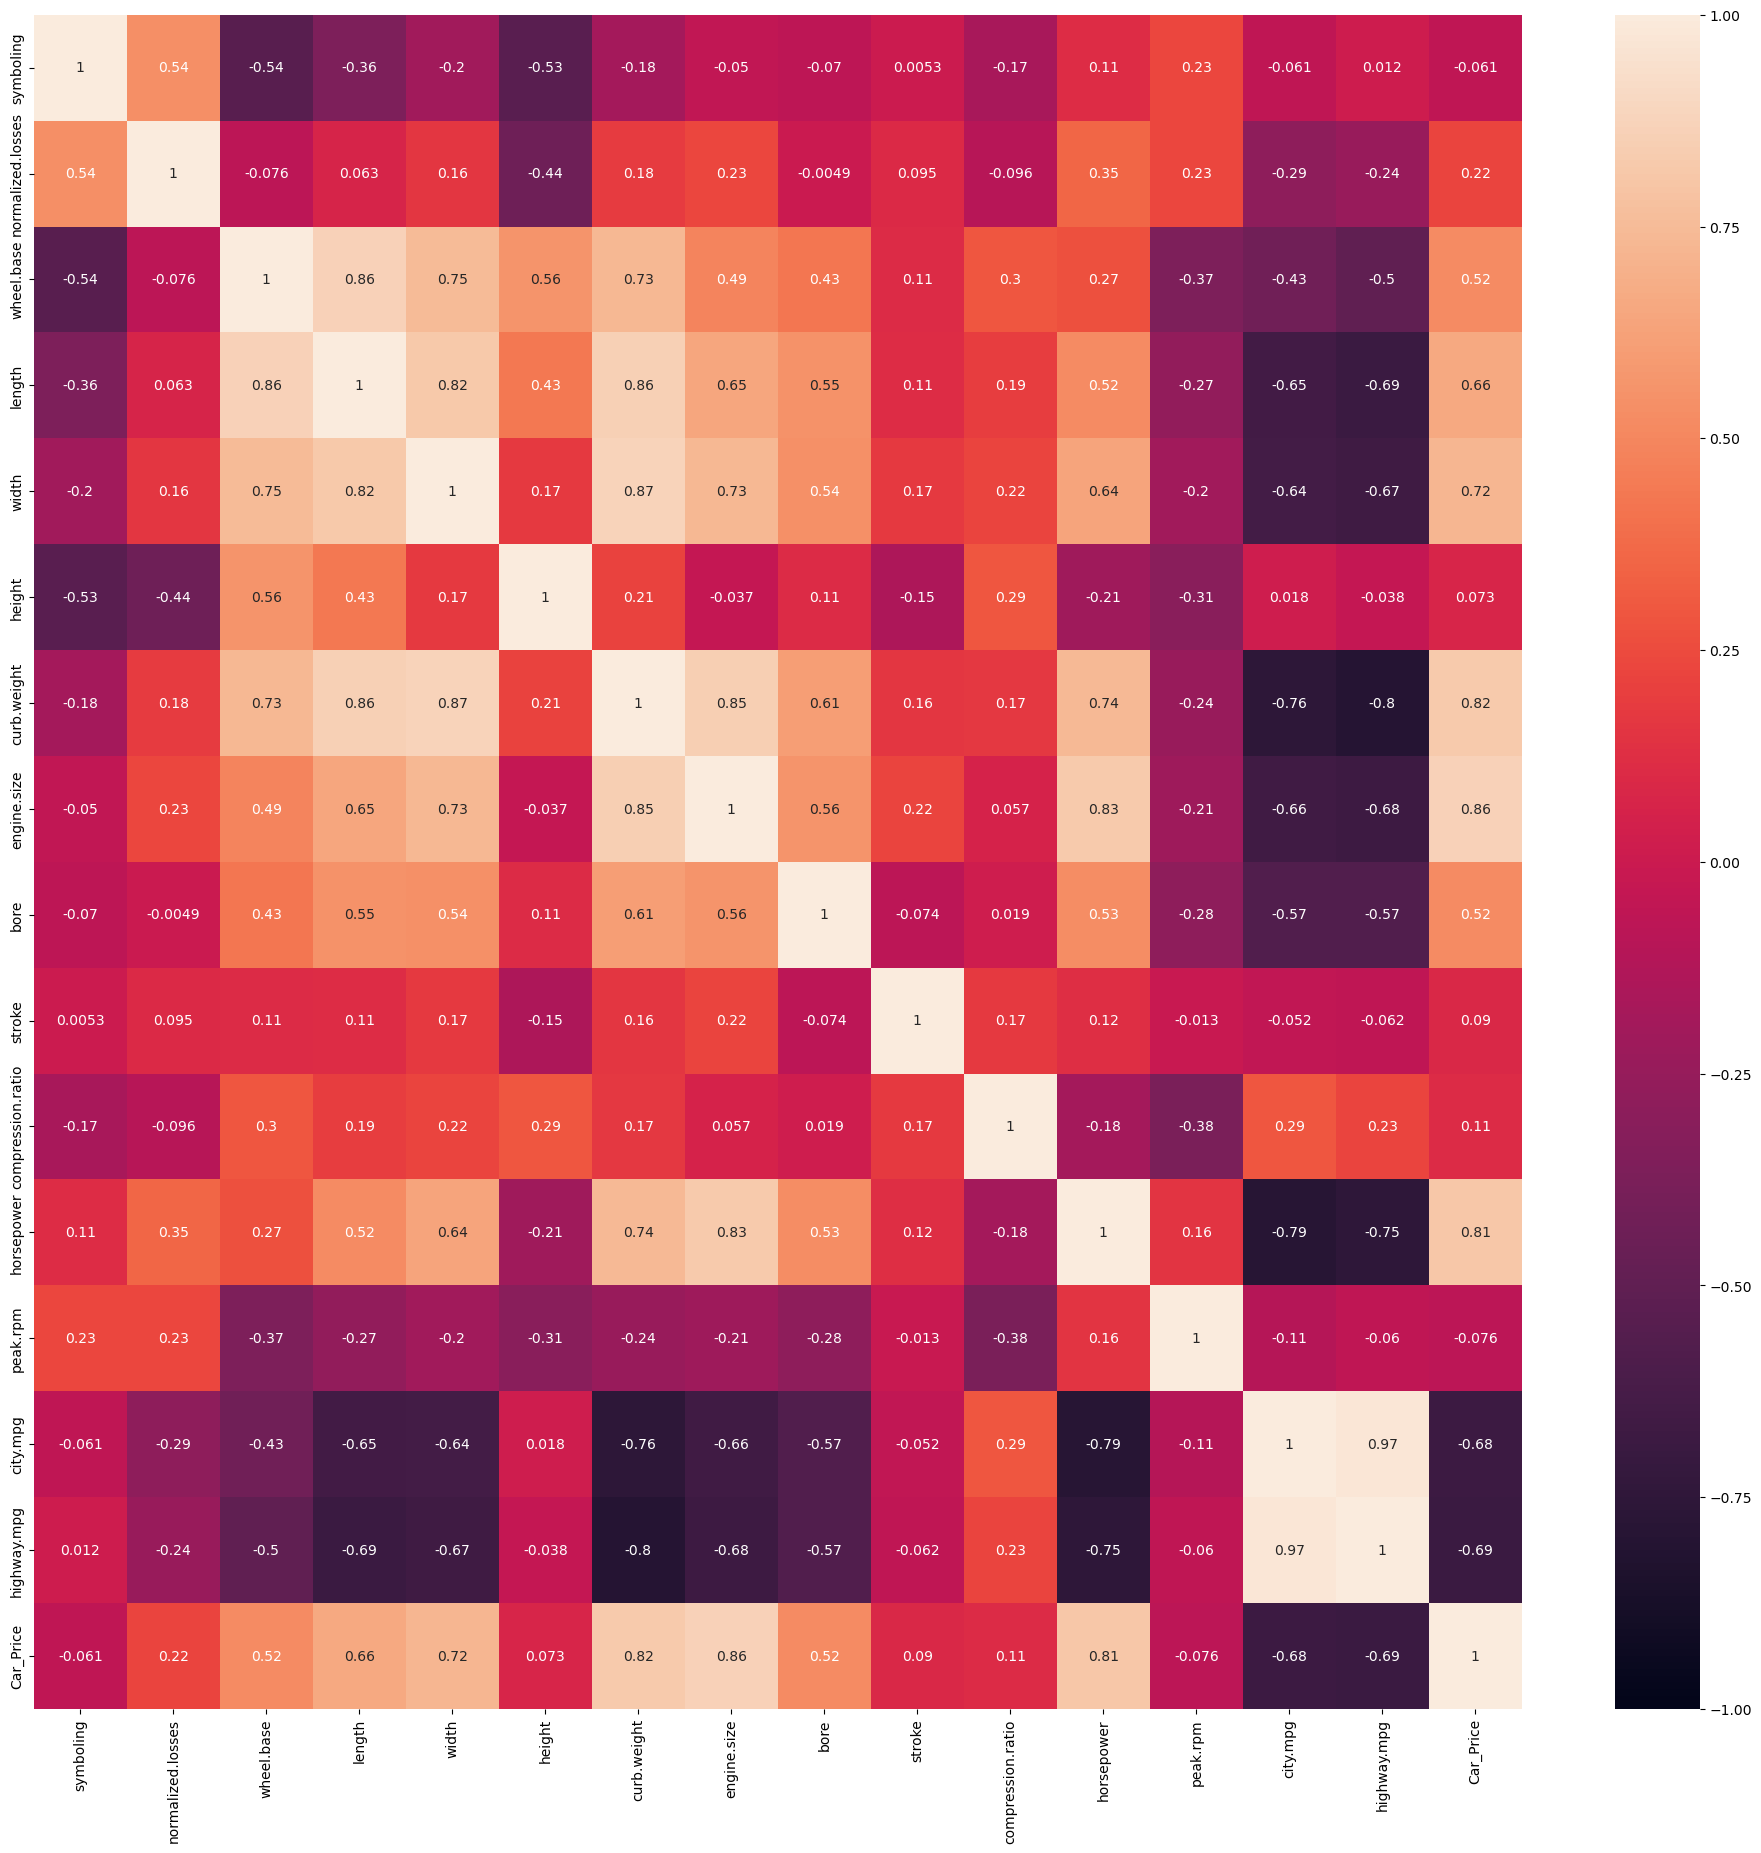

In [6]:
plt.figure(figsize=(24,22))
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1)
plt.show

array([[<Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'normalized.losses'}>,
        <Axes: title={'center': 'wheel.base'}>,
        <Axes: title={'center': 'length'}>],
       [<Axes: title={'center': 'width'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'curb.weight'}>,
        <Axes: title={'center': 'engine.size'}>],
       [<Axes: title={'center': 'bore'}>,
        <Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'compression.ratio'}>,
        <Axes: title={'center': 'horsepower'}>],
       [<Axes: title={'center': 'peak.rpm'}>,
        <Axes: title={'center': 'city.mpg'}>,
        <Axes: title={'center': 'highway.mpg'}>,
        <Axes: title={'center': 'Car_Price'}>]], dtype=object)

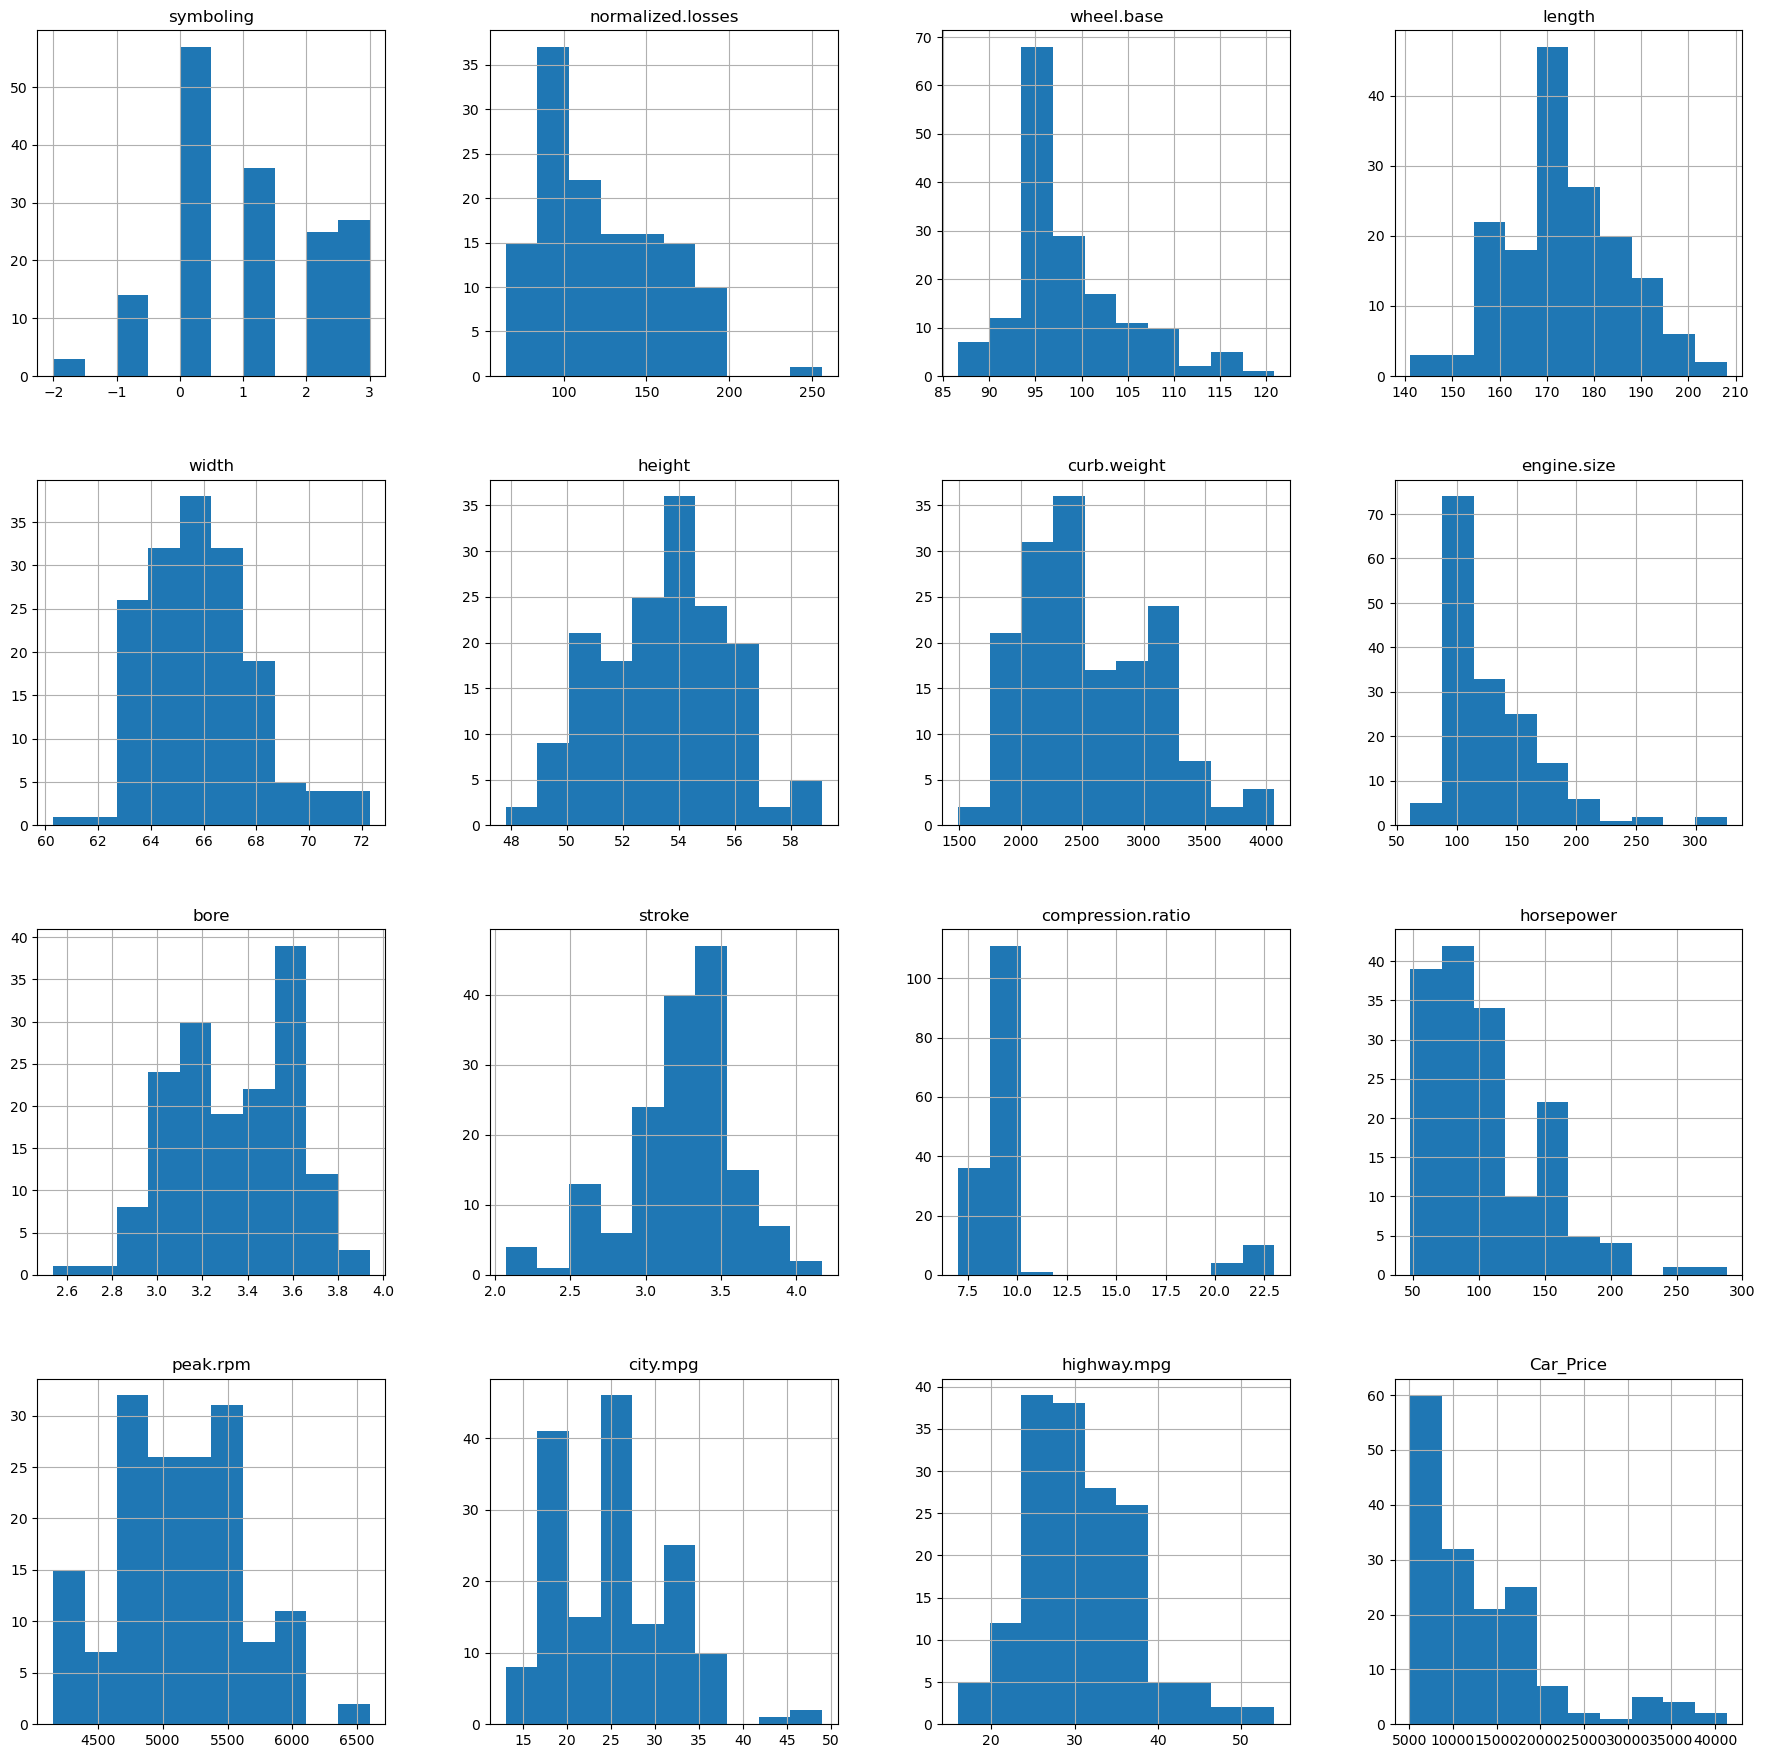

In [7]:
data.hist(figsize=(22,22))


<Axes: >

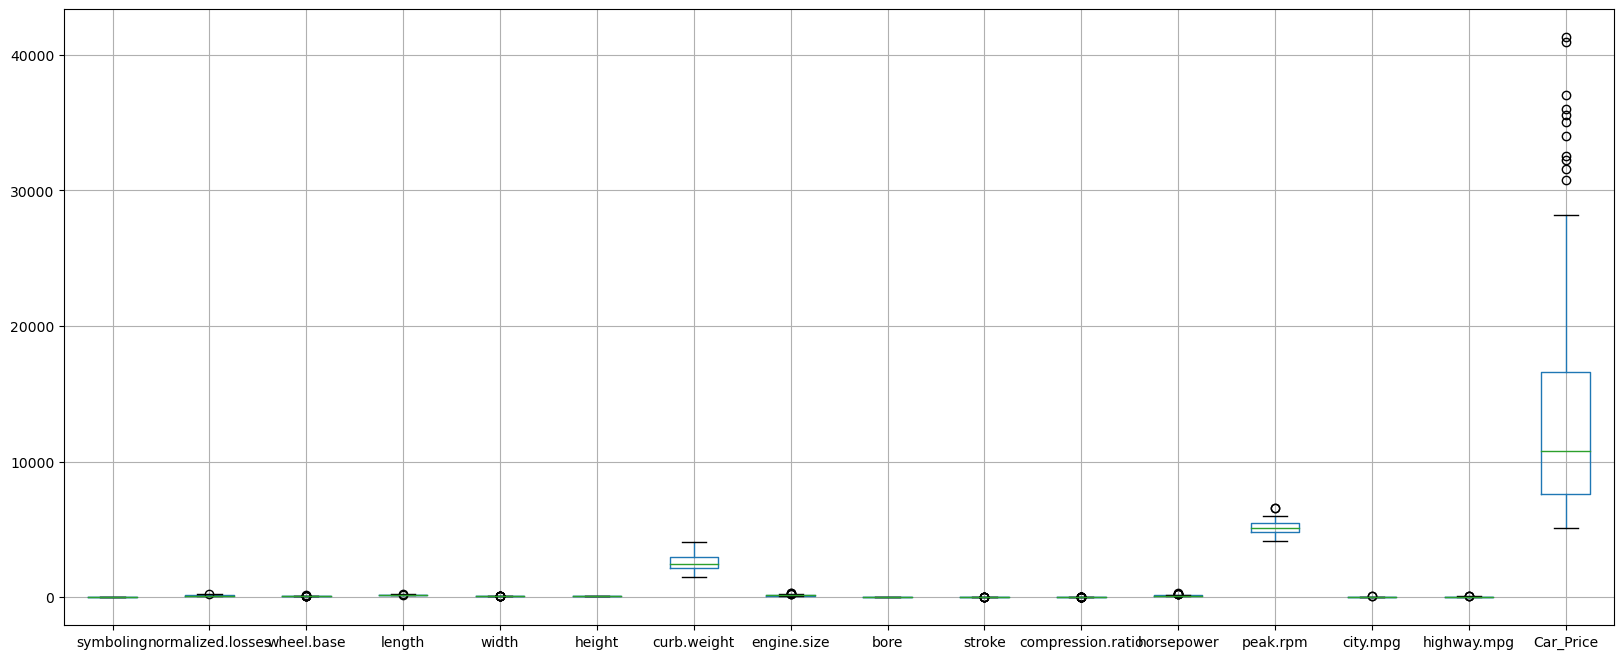

In [8]:
data.boxplot(figsize=(20,8))


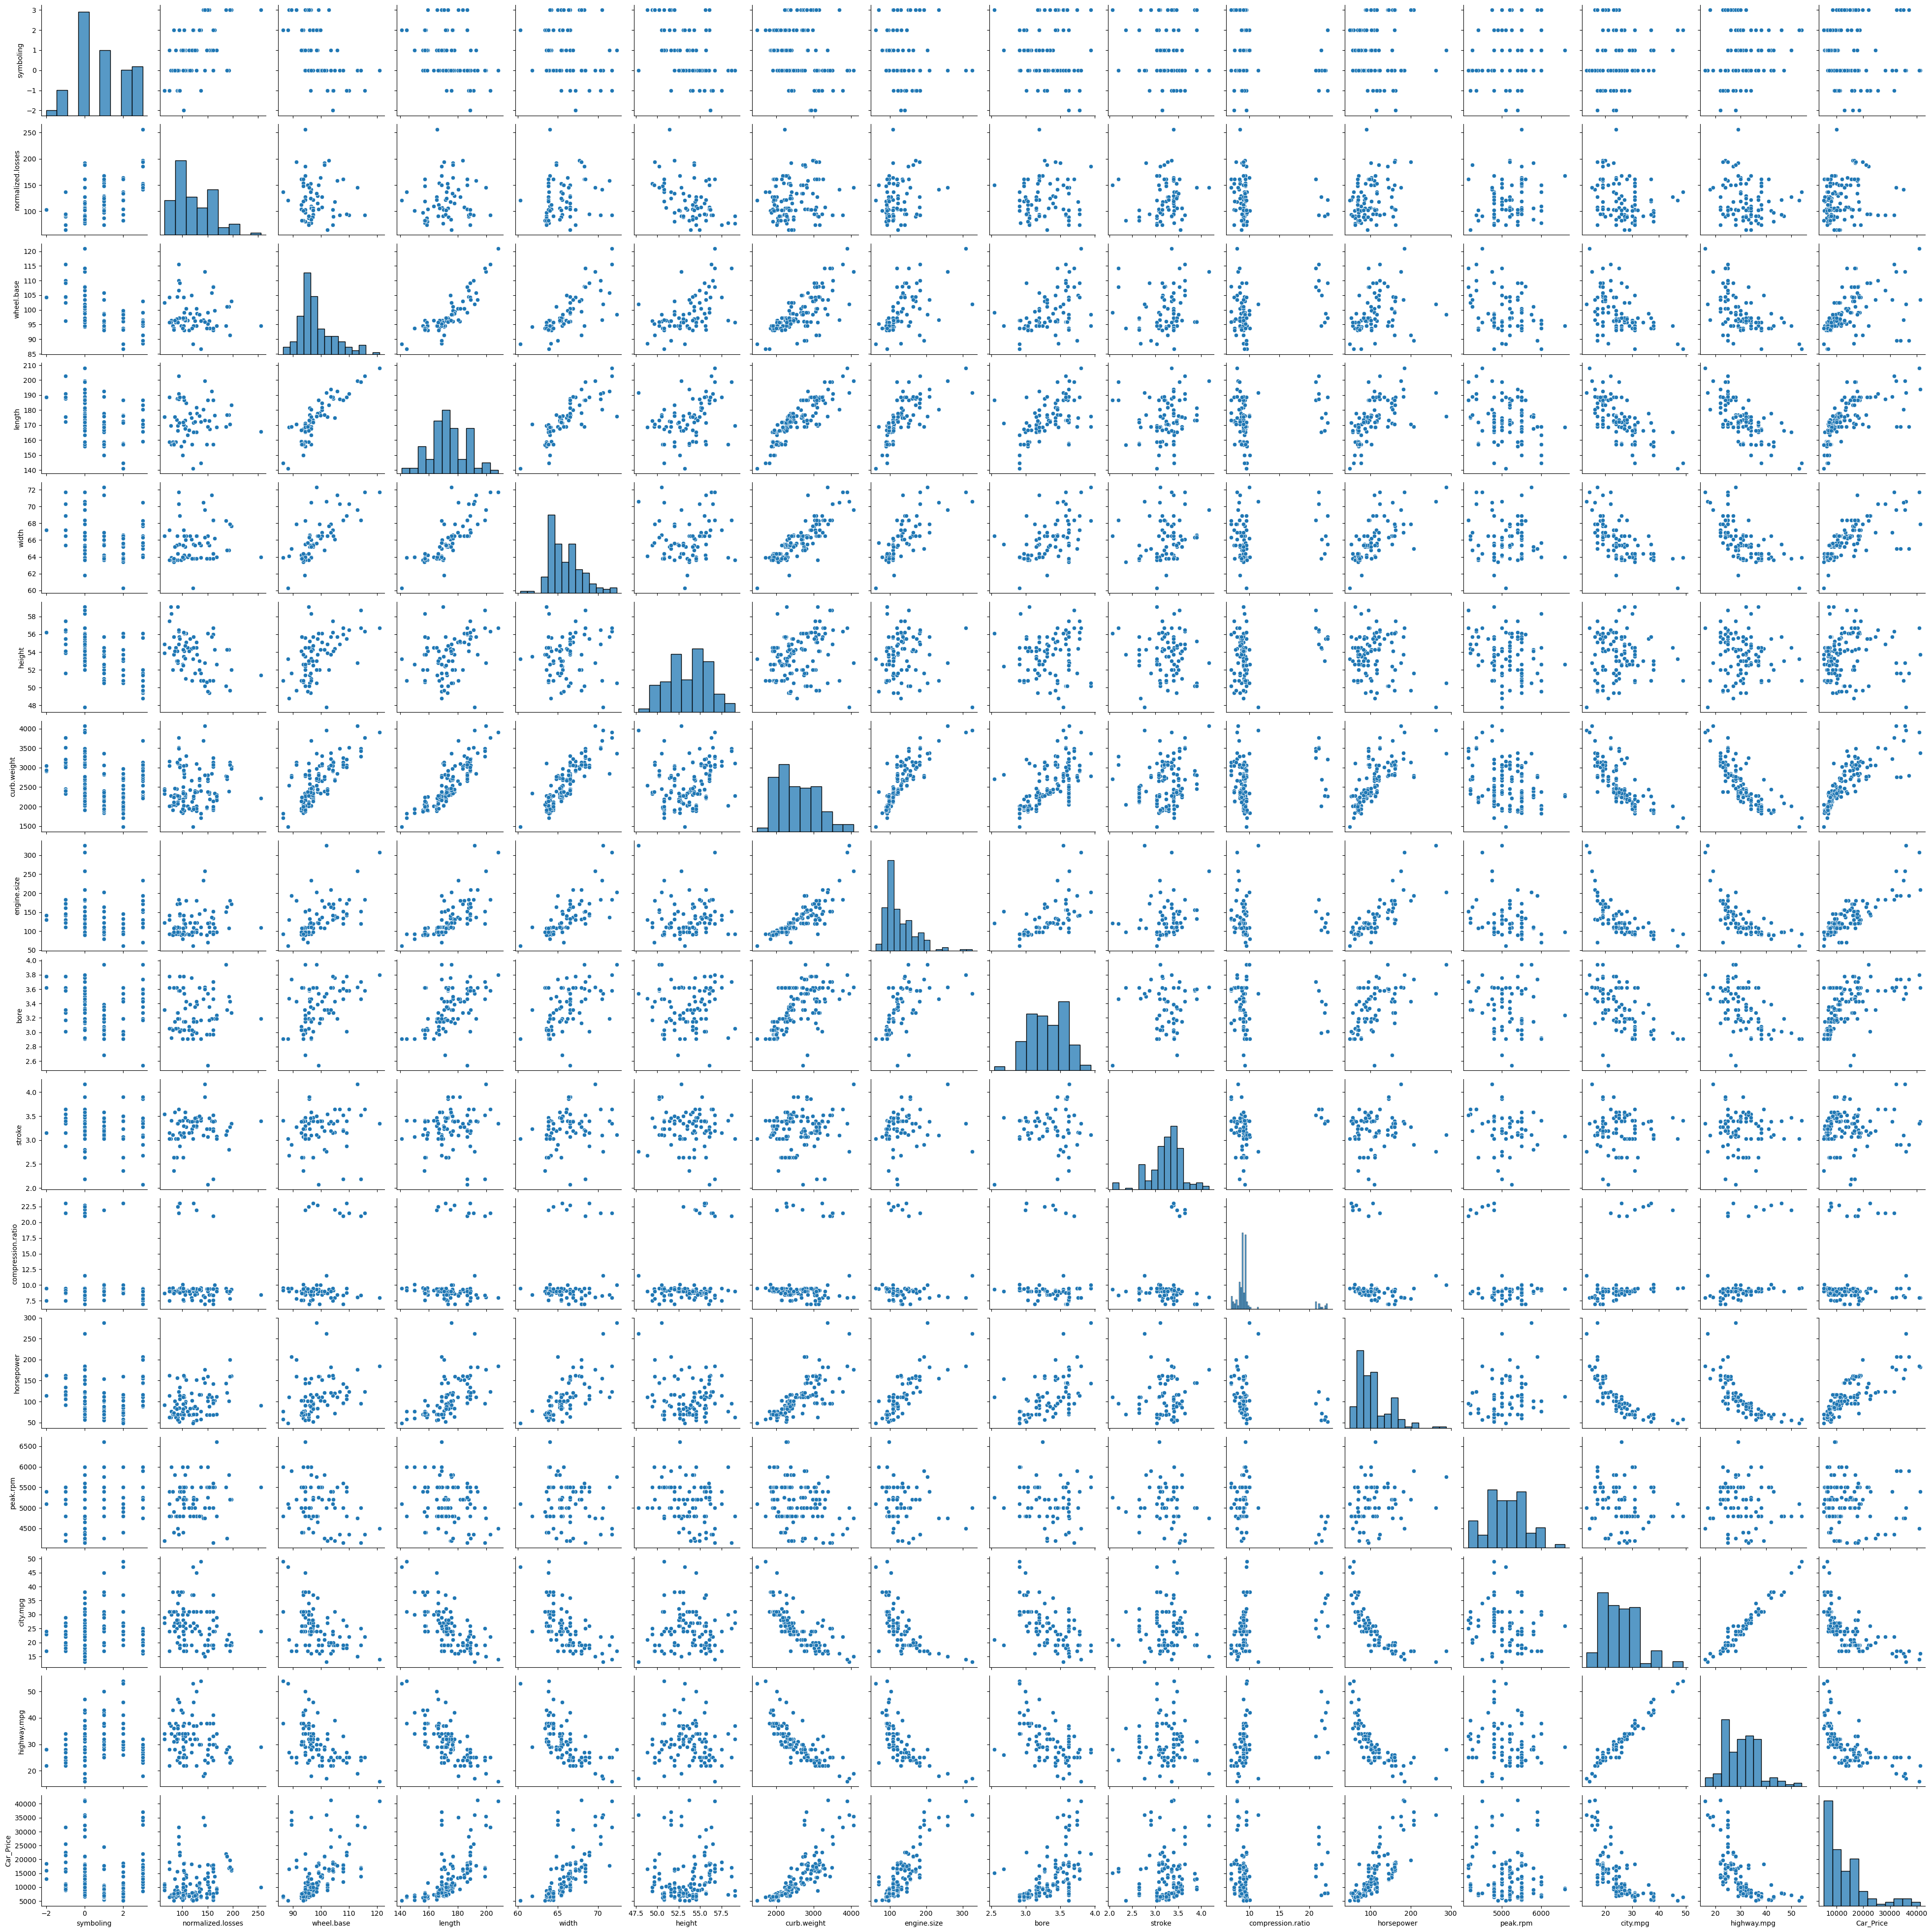

In [9]:
sns.pairplot(data)

In [10]:
df=data
df.head()

,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,...,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,Car_Price
0,1,129.0,mazda,gas,std,two,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,10595.0
1,1,125.0,mitsubishi,gas,std,four,sedan,fwd,front,96.3,...,122,2bbl,3.35,3.46,8.5,88.0,5000.0,25,32,8189.0
2,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
3,3,194.0,nissan,gas,std,NaN,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,9.0,160.0,5200.0,19,25,17199.0
4,0,85.0,honda,gas,std,four,sedan,fwd,front,96.5,...,110,mpfi,3.15,3.58,9.0,101.0,5800.0,24,28,12945.0


In [11]:
min_val=df['symboling'].min()
min_val

-2

In [12]:
df.shape

(162, 26)

In [13]:
#to remove negative values
for i in range(162):
    df['symboling'][i]=df['symboling'][i]+2
    i=i+1

C:\Users\eluri\AppData\Local\Temp\ipykernel_12680\2616834314.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['symboling'][i]=df['symboling'][i]+2


In [14]:
df.head()

,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,...,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,Car_Price
0,3,129.0,mazda,gas,std,two,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,10595.0
1,3,125.0,mitsubishi,gas,std,four,sedan,fwd,front,96.3,...,122,2bbl,3.35,3.46,8.5,88.0,5000.0,25,32,8189.0
2,5,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
3,5,194.0,nissan,gas,std,NaN,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,9.0,160.0,5200.0,19,25,17199.0
4,2,85.0,honda,gas,std,four,sedan,fwd,front,96.5,...,110,mpfi,3.15,3.58,9.0,101.0,5800.0,24,28,12945.0


In [15]:
df['symboling'].min()

0

In [16]:
df.isna().sum()

symboling             0
normalized.losses    30
make                  0
fuel.type             0
aspiration            0
num.of.doors         11
body.style            0
drive.wheels          0
engine.location       2
wheel.base            0
length                0
width                 0
height                0
curb.weight           0
engine.type           0
num.of.cylinders      2
engine.size           0
fuel.system           0
bore                  3
stroke                3
compression.ratio     0
horsepower            4
peak.rpm              4
city.mpg              0
highway.mpg           0
Car_Price             3
dtype: int64

In [17]:
df=df.fillna(method='bfill')

In [18]:
objcol=df.select_dtypes(include = 'object')

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [20]:
for i in objcol:
    df[i]=le.fit_transform(df[i])

In [21]:
x=df.iloc[:,:-1]
x.head()

,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,...,num.of.cylinders,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg
0,3,129.0,8,1,0,1,2,1,0,98.8,...,2,122,1,3.39,3.39,8.6,84.0,4800.0,26,32
1,3,125.0,10,1,0,0,3,1,0,96.3,...,2,122,1,3.35,3.46,8.5,88.0,5000.0,25,32
2,5,150.0,8,1,0,1,2,2,0,95.3,...,6,70,2,3.43,3.27,9.4,101.0,6000.0,17,23
3,5,194.0,11,1,0,0,2,2,0,91.3,...,3,181,5,3.43,3.27,9.0,160.0,5200.0,19,25
4,2,85.0,5,1,0,0,3,1,0,96.5,...,2,110,5,3.15,3.58,9.0,101.0,5800.0,24,28


In [22]:
y=df.iloc[:,-1:]
y.head()

,Car_Price
0,10595.0
1,8189.0
2,13645.0
3,17199.0
4,12945.0


In [23]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)


In [24]:
print(xtrain.shape)
print()


(129, 25)



In [25]:
print(ytrain.shape)
print()


(129, 1)



In [26]:
print(xtest.shape)
print()

(33, 25)



In [27]:
print(ytest.shape)


(33, 1)


# 1.Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(xtrain,ytrain)
ypred_lin_reg=lin_reg.predict(xtest)
#print('pridicted values\n',ypred_lin_reg)
print()
Accuracy_lin_reg=r2_score(ytest,ypred_lin_reg)
MSE_lin_reg=mean_squared_error(ytest,ypred_lin_reg)
RMSE_lin_reg=np.sqrt(mean_squared_error(ytest,ypred_lin_reg))
print("MSE Linear reg: \t",MSE_lin_reg)
print()
print("RMSE Linear reg: \t",RMSE_lin_reg)
print()
print("R-Square Linear reg:\t",Accuracy_lin_reg)


MSE Linear reg: 	 11365153.472270332

RMSE Linear reg: 	 3371.2243283813573

R-Square Linear reg:	 0.6483724444843357


# 2.KKNeighborsRegression

In [31]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(xtrain,ytrain)
ypred_knn_reg=knn_reg.predict(xtest)
#print('pridicted values\n',ypred_knn_reg)
print()
Accuracy_knn_reg=r2_score(ytest,ypred_knn_reg)
MSE_knn_reg=mean_squared_error(ytest,ypred_knn_reg)
RMSE_knn_reg=np.sqrt(mean_squared_error(ytest,ypred_knn_reg))
print("MSE KNN reg: \t",MSE_knn_reg)
print()
print("RMSE KNN reg: \t",RMSE_knn_reg)
print()
print("R-Square KNN reg:\t",Accuracy_knn_reg)


MSE KNN reg: 	 7574127.023569025

RMSE KNN reg: 	 2752.113192361285

R-Square KNN reg:	 0.7656633694423232


# 3.DecisionTreeRegression

In [30]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(max_depth=2,random_state=2)
dt_reg.fit(xtrain,ytrain)
ypred_dt_reg=dt_reg.predict(xtest)
#print('pridicted values\n',ypred_dt_reg)
print()

Accuracy_dt_reg=r2_score(ytest,ypred_dt_reg)
MSE_dt_reg=mean_squared_error(ytest,ypred_dt_reg)
RMSE_dt_reg=np.sqrt(mean_squared_error(ytest,ypred_dt_reg))
print("MSE Decision Tree reg: \t",MSE_dt_reg)
print()
print("RMSE Decision Tree reg: \t",RMSE_dt_reg)
print()
print("R-Square Decision Tree reg:\t",Accuracy_dt_reg)


MSE Decision Tree reg: 	 12729184.67693218

RMSE Decision Tree reg: 	 3567.7982954382637

R-Square Decision Tree reg:	 0.6061705543547764


# 4. Support Vector Reg

In [32]:
from sklearn.svm import SVR
svr_reg = SVR(kernel='linear')
svr_reg.fit(xtrain,ytrain)
ypred_svr_reg=svr_reg.predict(xtest)
#print('pridicted values\n',ypred_svr_reg)
print()

Accuracy_svr_reg=r2_score(ytest,ypred_svr_reg)
MSE_svr_reg=mean_squared_error(ytest,ypred_svr_reg)
RMSE_svr_reg=np.sqrt(mean_squared_error(ytest,ypred_svr_reg))
print("MSE SVR reg: \t",MSE_svr_reg)
print()
print("RMSE SVR Tree reg: \t",RMSE_svr_reg)
print()
print("R-Square SVR reg:\t",Accuracy_svr_reg)


MSE SVR reg: 	 10676130.479766902

RMSE SVR Tree reg: 	 3267.434847057689

R-Square SVR reg:	 0.6696901918547697


C:\Users\eluri\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# 5. AdaBoost

In [33]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg = AdaBoostRegressor(base_estimator=dt_reg,n_estimators=16)
ada_reg.fit(xtrain,ytrain)
ypred_ada_reg=ada_reg.predict(xtest)
#print('pridicted values\n',ypred_ada_reg)
print()

Accuracy_ada_reg=r2_score(ytest,ypred_ada_reg)
MSE_ada_reg=mean_squared_error(ytest,ypred_ada_reg)
RMSE_ada_reg=np.sqrt(mean_squared_error(ytest,ypred_ada_reg))
print("MSE Ada reg: \t",MSE_ada_reg)
print()
print("RMSE Ada Tree reg: \t",RMSE_ada_reg)
print()
print("R-Square Ada reg:\t",Accuracy_ada_reg)


MSE Ada reg: 	 13538027.750325732

RMSE Ada Tree reg: 	 3679.4058963813345

R-Square Ada reg:	 0.5811456821973451


C:\Users\eluri\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# 6. GradientBoost

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(n_estimators=17)
gb_reg.fit(xtrain,ytrain)
ypred_gb_reg=gb_reg.predict(xtest)
#print('pridicted values\n',ypred_gb_reg)
print()

Accuracy_gb_reg=r2_score(ytest,ypred_gb_reg)
MSE_gb_reg=mean_squared_error(ytest,ypred_gb_reg)
RMSE_gb_reg=np.sqrt(mean_squared_error(ytest,ypred_gb_reg))
print("MSE GradientBoost reg: \t",MSE_gb_reg)
print()
print("RMSE GradientBoost reg: \t",RMSE_gb_reg)
print()
print("R-Square GradientBoost reg:\t",Accuracy_gb_reg)


MSE GradientBoost reg: 	 10080934.612292344

RMSE GradientBoost reg: 	 3175.0487574669373

R-Square GradientBoost reg:	 0.6881050129518838


C:\Users\eluri\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# 7. Bagging

In [36]:


from sklearn.ensemble import BaggingRegressor
bag_reg=BaggingRegressor(base_estimator=knn_reg,n_estimators=5,random_state=1)
bag_reg.fit(xtrain,ytrain)
ypred_bag_reg=bag_reg.predict(xtest)
#print('pridicted values\n',ypred_bag_reg)
print()

Accuracy_bag_reg=r2_score(ytest,ypred_bag_reg)
MSE_bag_reg=mean_squared_error(ytest,ypred_bag_reg)
RMSE_bag_reg=np.sqrt(mean_squared_error(ytest,ypred_bag_reg))
print("MSE Bagging reg: \t",MSE_bag_reg)
print()
print("RMSE Bagging reg: \t",RMSE_bag_reg)
print()
print("R-Square Bagging reg:\t",Accuracy_bag_reg)

C:\Users\eluri\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_bagging.py:470: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)



MSE Bagging reg: 	 9999538.300606063

RMSE Bagging reg: 	 3162.204658241788

R-Square Bagging reg:	 0.6906233411184212


# 8. RandomForest

In [37]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators=23,random_state=1)
rf_reg.fit(xtrain,ytrain)
ypred_rf_reg=rf_reg.predict(xtest)
#print('pridicted values\n',ypred_rf_reg)
print()

Accuracy_rf_reg=r2_score(ytest,ypred_rf_reg)
MSE_rf_reg=mean_squared_error(ytest,ypred_rf_reg)
RMSE_rf_reg=np.sqrt(mean_squared_error(ytest,ypred_rf_reg))
print("MSE RandomForest reg: \t",MSE_rf_reg)
print()
print("RMSE RandomForest reg: \t",RMSE_rf_reg)
print()
print("R-Square RandomForest reg:\t",Accuracy_rf_reg)


MSE RandomForest reg: 	 12441959.348742625

RMSE RandomForest reg: 	 3527.3161679586683

R-Square RandomForest reg:	 0.6150570458816966


C:\Users\eluri\AppData\Local\Temp\ipykernel_12680\2752688879.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(xtrain,ytrain)


# 9. ExtraTrees

In [38]:
from sklearn.ensemble import ExtraTreesRegressor
et_reg=ExtraTreesRegressor(n_estimators=5,bootstrap=True)
et_reg.fit(xtrain,ytrain)
ypred_et_reg=et_reg.predict(xtest)
#print('pridicted values\n',ypred_et_reg)
print()

Accuracy_et_reg=r2_score(ytest,ypred_et_reg)
MSE_et_reg=mean_squared_error(ytest,ypred_et_reg)
RMSE_et_reg=np.sqrt(mean_squared_error(ytest,ypred_et_reg))
print("MSE ExtraTrees reg: \t",MSE_et_reg)
print()
print("RMSE ExtraTrees reg: \t",RMSE_et_reg)
print()
print("R-Square ExtraTrees reg:\t",Accuracy_et_reg)


MSE ExtraTrees reg: 	 10324773.475151516

RMSE ExtraTrees reg: 	 3213.218553903783

R-Square ExtraTrees reg:	 0.6805608593690846


C:\Users\eluri\AppData\Local\Temp\ipykernel_12680\1178156684.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  et_reg.fit(xtrain,ytrain)


# 10. Lasso

In [39]:
from sklearn.linear_model import Lasso
ls_reg=Lasso(alpha=0.01)
ls_reg.fit(xtrain,ytrain)
ypred_ls_reg=ls_reg.predict(xtest)
#print('pridicted values\n',ypred_ls_reg)
print()

Accuracy_ls_reg=r2_score(ytest,ypred_ls_reg)
MSE_ls_reg=mean_squared_error(ytest,ypred_ls_reg)
RMSE_ls_reg=np.sqrt(mean_squared_error(ytest,ypred_ls_reg))
print("MSE Lasso reg: \t",MSE_ls_reg)
print()
print("RMSE Lasso reg: \t",RMSE_ls_reg)
print()
print("R-Square Lasso reg:\t",Accuracy_ls_reg)


MSE Lasso reg: 	 11365266.03642854

RMSE Lasso reg: 	 3371.241023188425

R-Square Lasso reg:	 0.6483689618512252


# 11. Ridge

In [40]:
from sklearn.linear_model import Ridge
rr_reg=Lasso(alpha=0.01)
rr_reg.fit(xtrain,ytrain)
ypred_rr_reg=rr_reg.predict(xtest)
#print('pridicted values\n',ypred_rr_reg)
print()

Accuracy_rr_reg=r2_score(ytest,ypred_rr_reg)
MSE_rr_reg=mean_squared_error(ytest,ypred_rr_reg)
RMSE_rr_reg=np.sqrt(mean_squared_error(ytest,ypred_rr_reg))
print("MSE Ridge reg: \t",MSE_rr_reg)
print()
print("RMSE Ridge reg: \t",RMSE_rr_reg)
print()
print("R-Square Ridge reg:\t",Accuracy_rr_reg)


MSE Ridge reg: 	 11365266.03642854

RMSE Ridge reg: 	 3371.241023188425

R-Square Ridge reg:	 0.6483689618512252


In [43]:
scores=[('Lin_Reg',Accuracy_lin_reg),
        ('KNN_Reg',Accuracy_knn_reg),
        ('Decision Tree',Accuracy_dt_reg),
        ('SVR',Accuracy_svr_reg),
        ('Adaboost',Accuracy_ada_reg),
        ('Gradient Boost',Accuracy_gb_reg),
        ('Bagging',Accuracy_bag_reg),
        ('RandomForest',Accuracy_rf_reg),
        ('ExtraTrees',Accuracy_et_reg),
        ('Lasso',Accuracy_ls_reg),
        ('Ridge',Accuracy_rr_reg)
       ]
Acc_scores=pd.DataFrame(scores,columns=['Model','Acc_score'])
print(Acc_scores.sort_values(by='Acc_score',ascending=False))

             Model  Acc_score
1          KNN_Reg   0.765663
6          Bagging   0.690623
5   Gradient Boost   0.688105
8       ExtraTrees   0.680561
3              SVR   0.669690
0          Lin_Reg   0.648372
9            Lasso   0.648369
10           Ridge   0.648369
7     RandomForest   0.615057
2    Decision Tree   0.606171
4         Adaboost   0.581146


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Lin_Reg'),
  Text(1, 0, 'KNN_Reg'),
  Text(2, 0, 'Decision Tree'),
  Text(3, 0, 'SVR'),
  Text(4, 0, 'Adaboost'),
  Text(5, 0, 'Gradient Boost'),
  Text(6, 0, 'Bagging'),
  Text(7, 0, 'RandomForest'),
  Text(8, 0, 'ExtraTrees'),
  Text(9, 0, 'Lasso'),
  Text(10, 0, 'Ridge')])

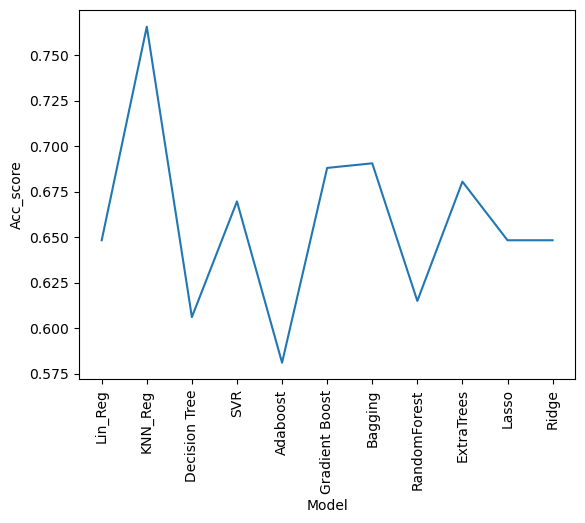

In [44]:
sns.lineplot(x=Acc_scores['Model'],y=Acc_scores['Acc_score'],data=Acc_scores)
plt.xticks(rotation=90)

In [45]:
test_data=pd.read_excel('cars_test.xlsx')
test_data.head()


,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,...,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,Car_Price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,NaN
1,2,164.0,audi,gas,std,four,sedan,4wd,NaN,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,NaN
2,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,NaN
3,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,NaN
4,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,NaN


In [46]:
df_test=test_data.iloc[:,:-1]
df_test.head()


,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,...,num.of.cylinders,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,2,164.0,audi,gas,std,four,sedan,4wd,NaN,99.4,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22
2,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25
3,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25
4,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20


In [47]:
df_test.shape
df_test['symboling'].min()

-1

In [48]:
for i in range(52):
    df_test['symboling'][i]=df_test['symboling'][i]+2
    i=i+1

C:\Users\eluri\AppData\Local\Temp\ipykernel_12680\3651960080.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['symboling'][i]=df_test['symboling'][i]+2


In [49]:
df_test.head()


,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,...,num.of.cylinders,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg
0,5,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,4,164.0,audi,gas,std,four,sedan,4wd,NaN,99.4,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22
2,4,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25
3,3,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25
4,3,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20


In [50]:
df_test.isna().sum()

symboling             0
normalized.losses    12
make                  0
fuel.type             0
aspiration            0
num.of.doors          5
body.style            0
drive.wheels          0
engine.location       4
wheel.base            0
length                0
width                 0
height                0
curb.weight           0
engine.type           0
num.of.cylinders      1
engine.size           0
fuel.system           0
bore                  1
stroke                1
compression.ratio     0
horsepower            0
peak.rpm              0
city.mpg              0
highway.mpg           0
dtype: int64

In [51]:
df_test=df_test.fillna(method='bfill')

In [52]:
objcol_test=df_test.select_dtypes(include = 'object')

In [54]:
for i in objcol_test:
    df_test[i]=le.fit_transform(df_test[i])
    result=knn_reg.predict(df_test)
print('result:\n',result)

result:
 [[14323.        ]
 [19292.66666667]
 [ 9711.        ]
 [17378.33333333]
 [19135.        ]
 [14271.66666667]
 [28824.66666667]
 [ 5720.        ]
 [ 5720.        ]
 [ 7751.66666667]
 [ 6362.33333333]
 [ 7751.66666667]
 [14323.        ]
 [10295.        ]
 [ 5755.33333333]
 [ 6274.        ]
 [12145.        ]
 [10357.66666667]
 [10357.66666667]
 [10357.66666667]
 [31562.66666667]
 [36088.66666667]
 [33856.        ]
 [14711.        ]
 [14711.        ]
 [11062.66666667]
 [ 7615.66666667]
 [ 7382.33333333]
 [ 9034.66666667]
 [18032.33333333]
 [19863.33333333]
 [16673.33333333]
 [ 6362.33333333]
 [ 6362.33333333]
 [14323.        ]
 [14133.33333333]
 [10357.66666667]
 [10399.        ]
 [ 6641.66666667]
 [ 8048.66666667]
 [ 7701.33333333]
 [ 7536.66666667]
 [ 9782.33333333]
 [ 7701.33333333]
 [ 9034.66666667]
 [ 7701.33333333]
 [11963.33333333]
 [ 9202.        ]
 [10823.        ]
 [20208.33333333]
 [15146.66666667]
 [17546.33333333]]


In [55]:
test_data['Car_Price']=result
test_data.head()

,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,...,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,Car_Price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,14323.000000
1,2,164.0,audi,gas,std,four,sedan,4wd,NaN,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,19292.666667
2,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,9711.000000
3,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17378.333333
4,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,19135.000000


In [56]:
test_data.to_csv('test_data_with_predictions.csv',index=False)